Saving venta_bicicletas_colombia1.xlsx to venta_bicicletas_colombia1 (1).xlsx
✅ Columnas: ['Marca', 'Modelo', 'Tipo', 'Unnamed: 3', 'Color', 'Talla', 'Material', 'Transmisión', 'Velocidades', 'Tamaño llanta (pulgadas)', 'Estado', 'Condición', 'Años de uso', 'Precio (COP)', 'Disponible en Colombia']


,Marca,Modelo,Tipo,Unnamed: 3,Color,Talla,Material,Transmisión,Velocidades,Tamaño llanta (pulgadas),Estado,Condición,Años de uso,Precio (COP),Disponible en Colombia
0,Polygon,X-Caliber,Montaña,NaN,Azul,M,Carbono,SRAM X01,18,27.5,Nueva,Excelente,0,8230000,Sí
1,GT,Neuro,Montaña,NaN,Plateado,M,Aluminio,SRAM GX,20,29.0,Nueva,Excelente,0,7430000,Sí
2,Merida,Neuro,Montaña,NaN,Gris,S,Aluminio,Shimano Acera,18,27.5,Nueva,Excelente,0,3750000,Sí
3,Bianchi,Oltre,Ruta,NaN,Morado,60 cm,Carbono,Shimano Dura-Ace,18,28.0,Usada,Buena,2,34960000,Sí
4,Totem,Híbrida 2,Urbana,NaN,Gris,S,Acero,Nexus 3,10,27.5,Usada,Buena,5,390000,Sí



🎯 Columna objetivo detectada: Precio (COP)

ℹ️ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Marca                     260 non-null    object 
 1   Modelo                    260 non-null    object 
 2   Tipo                      260 non-null    object 
 3   Unnamed: 3                0 non-null      float64
 4   Color                     260 non-null    object 
 5   Talla                     260 non-null    object 
 6   Material                  260 non-null    object 
 7   Transmisión               260 non-null    object 
 8   Velocidades               260 non-null    int64  
 9   Tamaño llanta (pulgadas)  260 non-null    float64
 10  Estado                    260 non-null    object 
 11  Condición                 260 non-null    object 
 12  Años de uso               260 non-null    int64  
 13  Precio (COP

,Unnamed: 3,Velocidades,Tamaño llanta (pulgadas),Años de uso,Precio (COP)
count,0.0,260.000000,260.000000,260.000000,2.600000e+02
mean,NaN,17.661538,27.828846,1.153846,1.201335e+07
std,NaN,5.967161,1.277415,1.701517,1.296505e+07
min,NaN,1.000000,20.000000,0.000000,3.600000e+05
25%,NaN,16.000000,27.500000,0.000000,2.787500e+06
50%,NaN,20.000000,28.000000,0.000000,8.330000e+06
75%,NaN,22.000000,28.000000,2.000000,1.539750e+07
max,NaN,24.000000,29.000000,5.000000,5.965000e+07



🧼 Nulos por columna:
Marca                         0
Modelo                        0
Tipo                          0
Unnamed: 3                  260
Color                         0
Talla                         0
Material                      0
Transmisión                   0
Velocidades                   0
Tamaño llanta (pulgadas)      0
Estado                        0
Condición                     0
Años de uso                   0
Precio (COP)                  0
Disponible en Colombia        0
dtype: int64


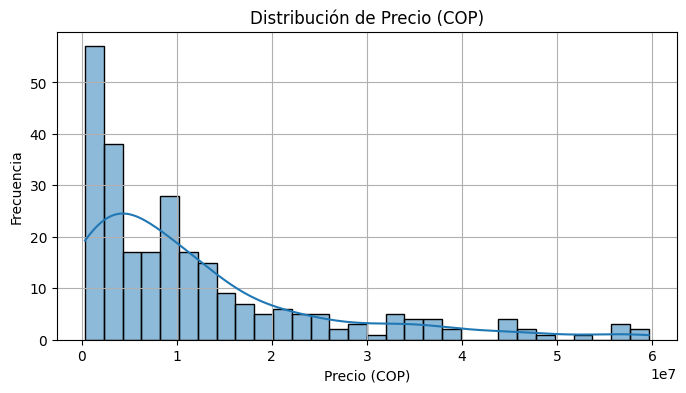

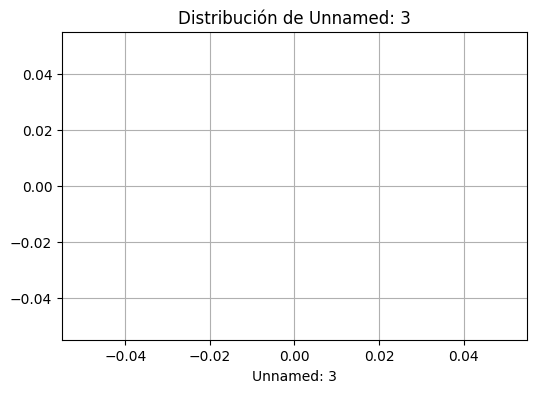

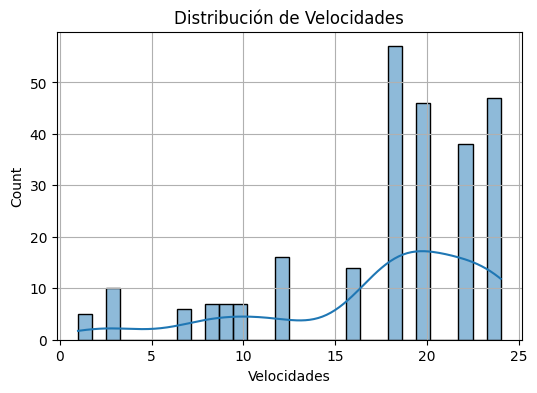

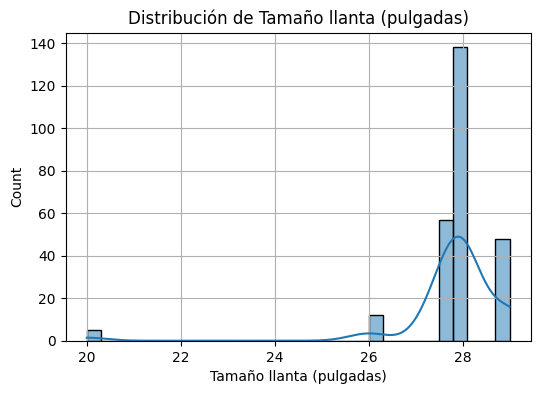

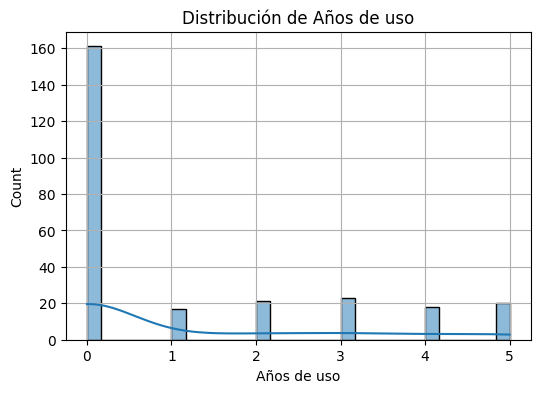

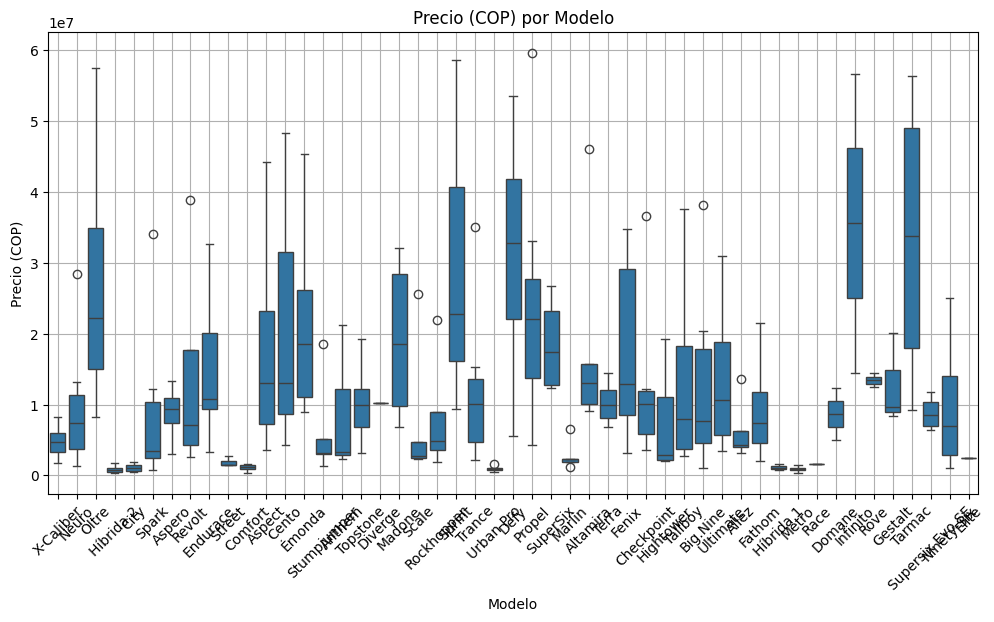

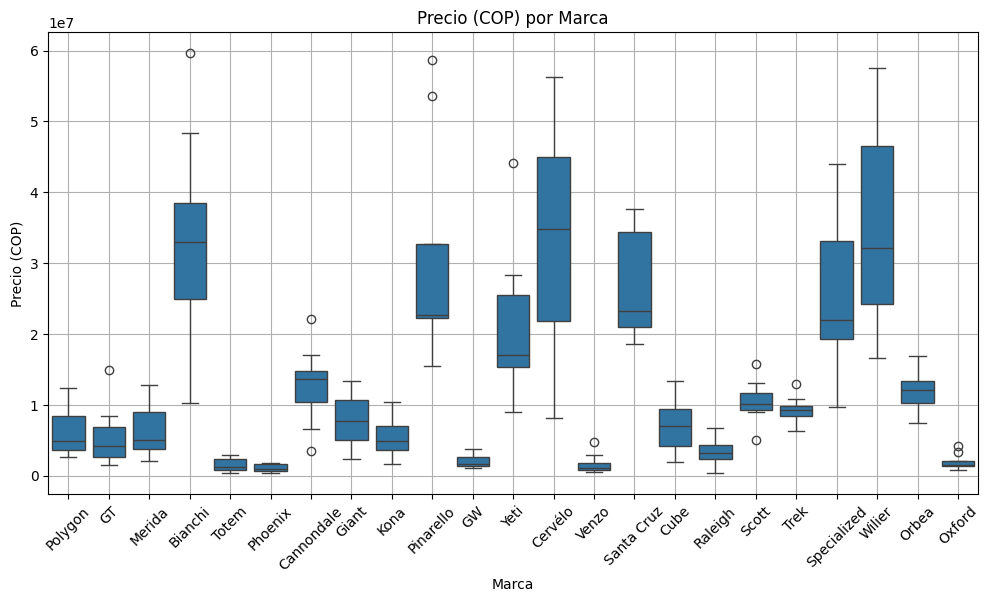

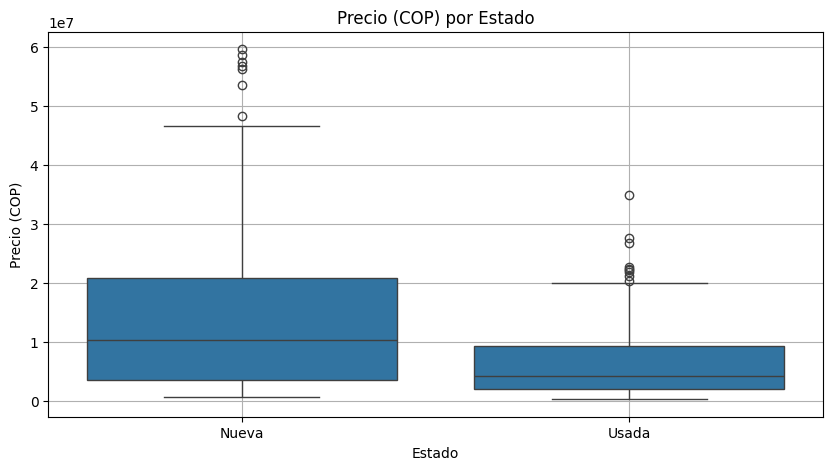

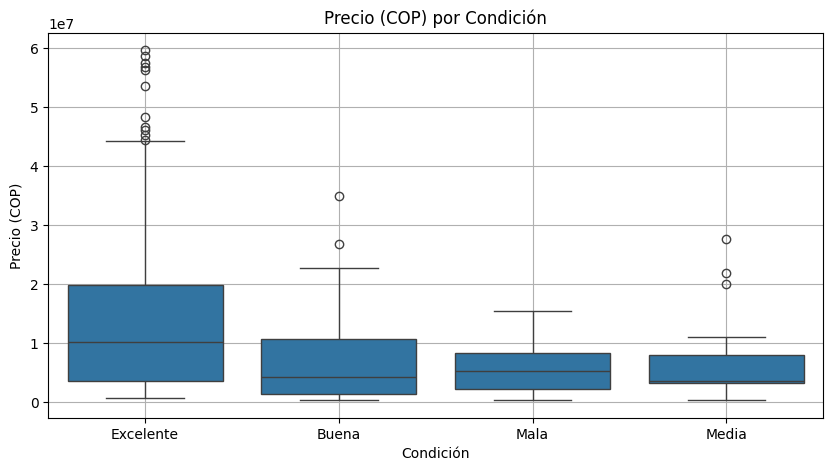


🧩 dtypes después de codificar (deben ser todos numéricos):
Velocidades                   int64
Tamaño llanta (pulgadas)    float64
Años de uso                   int64
Marca_Cannondale               bool
Marca_Cervélo                  bool
Marca_Cube                     bool
Marca_GT                       bool
Marca_GW                       bool
Marca_Giant                    bool
Marca_Kona                     bool
Marca_Merida                   bool
Marca_Orbea                    bool
Marca_Oxford                   bool
Marca_Phoenix                  bool
Marca_Pinarello                bool
Marca_Polygon                  bool
Marca_Raleigh                  bool
Marca_Santa Cruz               bool
Marca_Scott                    bool
Marca_Specialized              bool
dtype: object

Dimensiones -> X: (260, 135) | y: (260,)


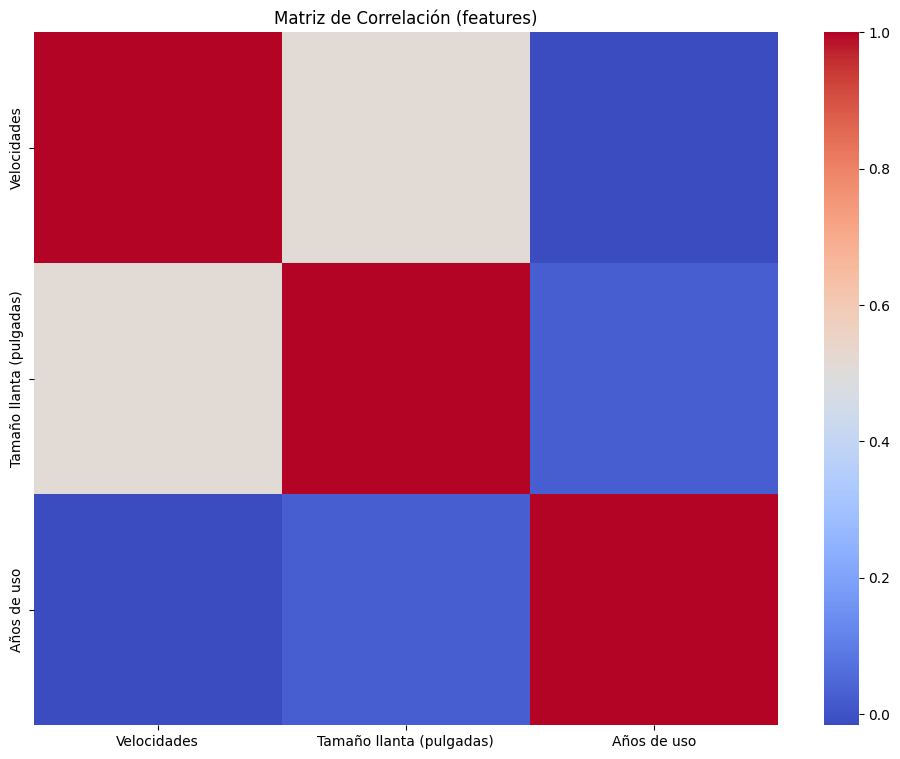


📦 Tamaño entrenamiento: 182
Tamaño validación: 39
Tamaño prueba: 39

📈 MÉTRICAS VALIDACIÓN
MSE : 116,186,376,664,974.20
R2  : 0.3353  (cuanto más cerca de 1, mejor)
RMSE: 10,778,978.46  (desviación media del precio)

🧾 MÉTRICAS PRUEBA
MSE : 126,796,484,457,451.33
R2  : -0.2380
RMSE: 11,260,394.51


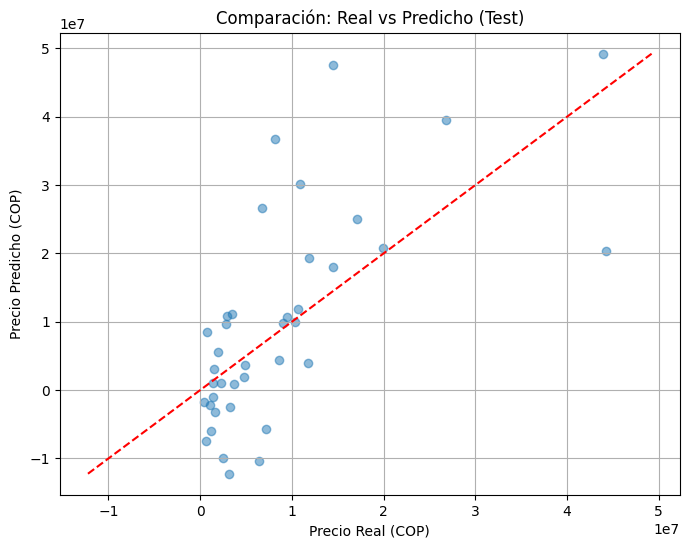


🚲 Precio estimado de la bicicleta: $6,691,196 COP


In [ ]:
# ============================================================
# 🔧 REGRESIÓN LINEAL PARA PRECIO DE BICICLETAS (COP)
# Funciona con: venta_bicicletas_colombia1.xlsx
# Estructura por pasos + todos los gráficos
# ============================================================

# Paso 0: Cargar el archivo (Colab)
from google.colab import files
uploaded = files.upload()  # Sube tu .xlsx

# Paso 1: Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

# Paso 2: Cargar datos y limpieza básica
DF_NAME = "venta_bicicletas_colombia1.xlsx"  # cámbialo si tu archivo tiene otro nombre
df = pd.read_excel(DF_NAME).copy()

# normaliza nombres de columnas
df.columns = [re.sub(r"\s+", " ", str(c).strip()) for c in df.columns]
df = df.drop_duplicates()

print("✅ Columnas:", list(df.columns))
display(df.head(5))

# Paso 3: Detección automática de la columna de precio
def detectar_columna_precio(df: pd.DataFrame) -> str:
    candidatos = ["precio", "valor", "monto", "costo", "price", "cost"]
    # (a) ya numérica
    for c in df.columns:
        if any(s in c.lower() for s in candidatos) and pd.api.types.is_numeric_dtype(df[c]):
            return c
    # (b) convertir si viene como texto con símbolos
    for c in df.columns:
        if any(s in c.lower() for s in candidatos):
            coerced = pd.to_numeric(
                df[c].astype(str).str.replace(r"[^0-9\.-]", "", regex=True),
                errors="coerce"
            )
            if coerced.notna().mean() >= 0.6:
                df[c] = coerced
                return c
    # (c) fallback: última numérica (no-ID)
    numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    id_like = [c for c in df.columns if re.search(r"\b(id|codigo|código|code)\b", c.lower())]
    numeric_non_id = [c for c in numeric_cols if c not in id_like]
    if numeric_non_id:
        return numeric_non_id[-1]
    raise ValueError("No se detectó una columna de precio; revisa el archivo.")

target_col = detectar_columna_precio(df)
print(f"\n🎯 Columna objetivo detectada: {target_col}")

# Paso 4: EDA rápido
print("\nℹ️ Info:")
print(df.info())
print("\n📊 Describe (numéricas):")
display(df.describe())
print("\n🧼 Nulos por columna:")
print(df.isnull().sum())

# Distribución del precio
if pd.api.types.is_numeric_dtype(df[target_col]):
    plt.figure(figsize=(8,4))
    sns.histplot(df[target_col].dropna(), kde=True, bins=30)
    plt.title(f"Distribución de {target_col}")
    plt.xlabel(target_col)
    plt.ylabel("Frecuencia")
    plt.grid(True); plt.show()

# Otras numéricas (hasta 6)
num_cols_auto = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != target_col]
for col in num_cols_auto[:6]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.grid(True); plt.show()

# Boxplots útiles si existen
def cols_si(df, lista):
    return [c for c in lista if c in df.columns]

candidatas_modelo = cols_si(df, ["Modelo", "Marca", "Tipo", "Categoria", "Categoría"])
for colcat in candidatas_modelo[:2]:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=colcat, y=target_col, data=df)
    plt.title(f"{target_col} por {colcat}")
    plt.xticks(rotation=45); plt.grid(True); plt.show()

candidatas_estado = cols_si(df, ["Estado", "Condicion", "Condición", "Estado general"])
for colcat in candidatas_estado[:2]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=colcat, y=target_col, data=df)
    plt.title(f"{target_col} por {colcat}")
    plt.grid(True); plt.show()

# Paso 5: Preprocesamiento robusto (codifica TODAS las categóricas)
def normalizar_si_no(s):
    """Normaliza variantes de Sí/No a 'Si'/'No'."""
    x = str(s).strip().lower()
    if x in {"si", "sí", "s", "true", "1"}: return "Si"
    if x in {"no", "n", "false", "0"}:     return "No"
    return s

def codificar_todo(df_in: pd.DataFrame, target: str) -> pd.DataFrame:
    df = df_in.copy()

    # Limpieza ligera de strings
    for c in df.columns:
        if df[c].dtype == object:
            df[c] = df[c].astype(str).str.strip()

    # Manejo especial de 'Estado general' si existe (ordinal)
    if "Estado general" in df.columns:
        mapa = {"Malo": 0, "Medio": 1, "Bueno": 2}
        df["Estado general"] = df["Estado general"].map(mapa).fillna(1)

    # Normaliza Sí/No donde aplique
    for c in df.columns:
        if df[c].dtype == object:
            # si solo hay variantes de si/no en la columna, normalízala
            sample = df[c].dropna().astype(str).str.lower().unique()
            if set(sample).issubset({"si","sí","s","no","n","true","false","1","0"}):
                df[c] = df[c].map(normalizar_si_no)

    # Relleno de nulos (numéricas: mediana, texto: 'Desconocido')
    for c in df.columns:
        if c == target:
            continue
        if pd.api.types.is_numeric_dtype(df[c]):
            df[c] = df[c].fillna(df[c].median())
        else:
            df[c] = df[c].fillna("Desconocido")

    # Eliminar columnas con todos los valores NaN
    df = df.dropna(axis=1, how='all')

    # Categóricas = object/category (excepto target)
    cat_cols = [c for c in df.columns if c != target and (df[c].dtype == object or str(df[c].dtype) == "category")]

    # One-hot para TODAS las categóricas (¡clave para evitar el error 'Big.Nine'!)
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df_encoded


df_encoded = codificar_todo(df, target_col)

# Separar X e y
if target_col not in df_encoded.columns:
    # por si el target fue dummificado por error (no debería)
    df_encoded[target_col] = df[target_col].astype(float)

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col].astype(float)

print("\n🧩 dtypes después de codificar (deben ser todos numéricos):")
print(X.dtypes.head(20))
print("\nDimensiones -> X:", X.shape, "| y:", y.shape)

# Matriz de correlación (solo numéricas)
if X.shape[1] > 1:
    # Select only numeric columns before calculating correlation
    numeric_X = X.select_dtypes(include=np.number)
    if not numeric_X.empty:
        corr = numeric_X.corr()
        plt.figure(figsize=(12,9))
        sns.heatmap(corr, cmap="coolwarm", annot=False)
        plt.title("Matriz de Correlación (features)")
        plt.show()


# Paso 6: Split 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\n📦 Tamaño entrenamiento: {len(X_train)}")
print(f"Tamaño validación: {len(X_val)}")
print(f"Tamaño prueba: {len(X_test)}")

# Paso 7: Entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 8: Validación
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val  = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

print("\n📈 MÉTRICAS VALIDACIÓN")
print("MSE :", f"{mse_val:,.2f}")
print("R2  :", f"{r2_val:.4f}  (cuanto más cerca de 1, mejor)")
print("RMSE:", f"{rmse_val:,.2f}  (desviación media del precio)")

# Paso 9: Prueba
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\n🧾 MÉTRICAS PRUEBA")
print("MSE :", f"{mse_test:,.2f}")
print("R2  :", f"{r2_test:.4f}")
print("RMSE:", f"{rmse_test:,.2f}")

# Paso 10: Gráficos de desempeño
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
lo = min(y_test.min(), y_test_pred.min())
hi = max(y_test.max(), y_test_pred.max())
plt.plot([lo, hi], [lo, hi], 'r--')
plt.xlabel("Precio Real (COP)")
plt.ylabel("Precio Predicho (COP)")
plt.title("Comparación: Real vs Predicho (Test)")
plt.grid(True); plt.show()

# Paso 11: Predicción de ejemplo con entrada fija (ajusta a tus columnas)
# Rellena SOLO con campos que existan en TU Excel (otros se ignoran)
nuevo_raw = {
    "Marca": "Trek",
    "Tipo": "Montaña",
    "Material": "Aluminio",
    "Talla": "M",
    "Año": 2022,
    "Estado": "Usado",
    "Estado general": "Bueno",
    # ... agrega aquí cualquier otra columna real de tu dataset
}

# Preparar entrada nueva con la MISMA transformación
def preparar_entrada(raw: dict, X_cols: list) -> pd.DataFrame:
    tmp = pd.DataFrame([raw])
    # aplicar misma lógica de codificación
    tmp_all = pd.concat([df.drop(columns=[target_col]), tmp], axis=0, ignore_index=True)
    tmp_all = codificar_todo(tmp_all, target_col)  # codifica todo
    # recuperar SOLO la última fila (la nueva) y alinear columnas
    tmp_enc = tmp_all.tail(1).copy()
    for c in X_cols:
        if c not in tmp_enc.columns:
            tmp_enc[c] = 0
    # reordenar y descartar extras
    tmp_enc = tmp_enc[X_cols]
    return tmp_enc

nuevo_encoded = preparar_entrada(nuevo_raw, X.columns.tolist())
precio_estimado = model.predict(nuevo_encoded)[0]
print(f"\n🚲 Precio estimado de la bicicleta: ${int(precio_estimado):,} COP")